In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loading the dataset

In [3]:
file_path = r"C:\Users\shish\Desktop\bright_automotive_company.csv"

df = pd.read_csv(file_path)


# CHecking the top 5 rows

In [4]:

print(df.head())

   Age  Gender Profession Marital_status      Education No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                4   
1   53   Femal   Salaried        Married  Post Graduate                4   
2   53  Female   Salaried        Married  Post Graduate                3   
3   53  Female   Salaried        Married       Graduate                ?   
4   53    Male        NaN        Married  Post Graduate                3   

  Personal_loan House_loan Partner_working   Salary  Partner_salary  \
0            No         No             Yes  99300.0         70700.0   
1           Yes         No             Yes  95500.0         70300.0   
2            No         No             Yes  97300.0         60700.0   
3           Yes         No             Yes  72500.0         70300.0   
4            No         No             Yes  79700.0         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SU

# Display the last 5 rows

In [20]:
print(df.tail())


      Age Gender Profession Marital_status Education No_of_Dependents  \
1576   22   Male   Salaried         Single  Graduate                2   
1577   22   Male   Business        Married  Graduate                4   
1578   22   Male   Business         Single  Graduate                2   
1579   22   Male   Business        Married  Graduate                3   
1580   22   Male   Salaried        Married  Graduate                4   

     Personal_loan House_loan Partner_working   Salary  Partner_salary  \
1576            No        Yes              No  33300.0             0.0   
1577            No         No              No  32000.0             NaN   
1578            No        Yes              No  32900.0             0.0   
1579           Yes        Yes              No  32200.0             NaN   
1580            No         No              No  31600.0             0.0   

      Total_salary  Price       Make  
1576         33300  27000  Hatchback  
1577         32000  31000  Hatchback  

# Check the shape of dataset

In [9]:
df.shape

(1581, 14)

# Check the datatypes of each feature.

In [22]:
print(df.dtypes)

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan        object
House_loan           object
Partner_working      object
Salary              float64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


# total no. of duplicates rows

In [10]:
df.duplicated().sum()

0

In [11]:
df[df.duplicated()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


#   Check the NULL  Values

In [12]:
df.isnull().sum()  

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

# # Percentage wise null values in columns

In [13]:
df.isnull().sum()/len(df)*100

Age                 0.000000
Gender              3.352309
Profession          0.379507
Marital_status      0.000000
Education           0.000000
No_of_Dependents    0.000000
Personal_loan       0.000000
House_loan          0.000000
Partner_working     0.000000
Salary              0.822264
Partner_salary      6.704617
Total_salary        0.000000
Price               0.000000
Make                0.000000
dtype: float64

# Percentage wise null values in rows

In [14]:
df.isnull().sum(axis=1).sort_values(ascending=False)

571     2
1467    2
1155    2
327     1
1244    1
       ..
561     0
560     0
559     0
558     0
1580    0
Length: 1581, dtype: int64

# OLUTLIER ANALYSis

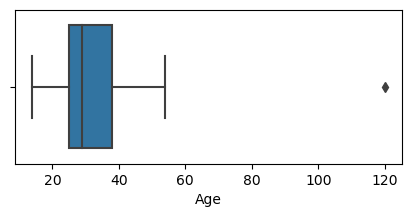

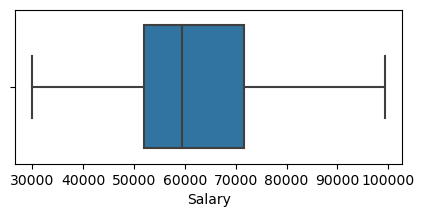

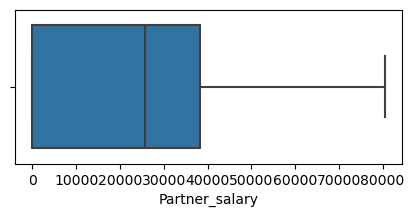

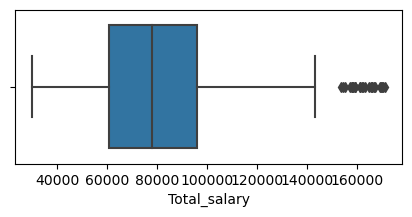

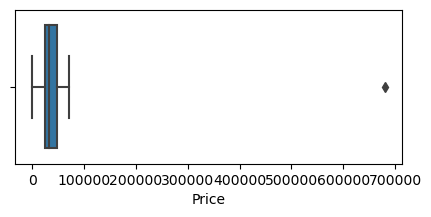

In [16]:
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)

# Finding the no. of outliers in each column

In [18]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('---------------------------------------------------')

Number of ouliers in  Age : 1
---------------------------------------------------
Number of ouliers in  Salary : 0
---------------------------------------------------
Number of ouliers in  Partner_salary : 0
---------------------------------------------------
Number of ouliers in  Total_salary : 27
---------------------------------------------------
Number of ouliers in  Price : 1
---------------------------------------------------


# What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [23]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
std_age = df['Age'].std()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age}")


Mean Age: 31.952561669829223
Median Age: 29.0
Standard Deviation of Age: 8.71254886208395


# What is the distribution of gender in the dataset? Represent it using a pie chart.

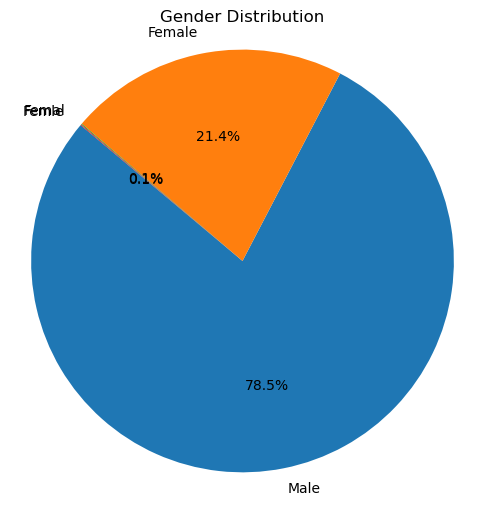

In [24]:
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


# Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result.

In [25]:
# Calculate the correlation coefficient between Age and Salary
correlation = df['Age'].corr(df['Salary'])

print(f"Correlation between Age and Salary: {correlation}")


Correlation between Age and Salary: 0.6023547357942133


# What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [26]:
avg_salary_by_education = df.groupby('Education')['Salary'].mean()

print(avg_salary_by_education)


Education
Graduate         48440.709459
Post Graduate    67456.250000
Name: Salary, dtype: float64


# What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

In [29]:
import matplotlib.pyplot as plt
average_price = df['Price'].mean()
print(f"Average price of the product/service: {average_price:.2f}")
salary_bins = [0, 30000, 60000, 90000, 120000]  # Example bins
salary_labels = ['Low', 'Medium', 'High', 'Very High']
df['Salary_Group'] = pd.cut(df['Salary'], bins=salary_bins, labels=salary_labels)

avg_price_by_salary_group = df.groupby('Salary_Group')['Price'].mean()

print(avg_price_by_salary_group)



Average price of the product/service: 35948.17
Salary_Group
Low          20500.000000
Medium       31715.346535
High         39493.860846
Very High    60800.000000
Name: Price, dtype: float64


# What is the average partner's salary for individuals with and without house loans?

In [32]:
# Print all columns
print("Columns in the dataset:", df.columns.tolist())

# Update these after you confirm the correct column names
partner_salary_col = 'Partner_Salary'  # Update if different
house_loan_col = 'House_Loan'          # Replace with actual column name for house loan

if house_loan_col not in df.columns:
    print(f"Column '{house_loan_col}' not found! Please update to the correct house loan column name.")
else:
    avg_partner_salary_by_house_loan = df.groupby(house_loan_col)[partner_salary_col].mean()
    print("Average partner's salary by house loan status:")
    print(avg_partner_salary_by_house_loan)


Columns in the dataset: ['Age', 'Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make', 'Salary_Group']
Column 'House_Loan' not found! Please update to the correct house loan column name.
